# 第6章
本章では，Fabio Gasparetti氏が公開しているNews Aggregator Data Setを用い，ニュース記事の見出しを「ビジネス」「科学技術」「エンターテイメント」「健康」のカテゴリに分類するタスク（カテゴリ分類）に取り組む．

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/nlp100/'

In [ ]:
import warnings

warnings.simplefilter('ignore')

#50. データの入手・整形
News Aggregator Data Setをダウンロードし、以下の要領で学習データ（train.txt），検証データ（valid.txt），評価データ（test.txt）を作成せよ．



1.   ダウンロードしたzipファイルを解凍し，readme.txtの説明を読む．
2.   情報源（publisher）が"Reuters", “Huffington Post", “Businessweek", “Contactmusic.com", “Daily Mail"の事例（記事）のみを抽出する．
3.   抽出された事例をランダムに並び替える．
4.   抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．
ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）．

学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．

In [ ]:
!unzip /content/drive/MyDrive/nlp100/NewsAggregatorDataset.zip

Archive:  /content/drive/MyDrive/nlp100/NewsAggregatorDataset.zip
  inflating: 2pageSessions.csv       
   creating: __MACOSX/
  inflating: __MACOSX/._2pageSessions.csv  
  inflating: newsCorpora.csv         
  inflating: __MACOSX/._newsCorpora.csv  
  inflating: readme.txt              
  inflating: __MACOSX/._readme.txt   



readmeより
```
CONTENT
=======

FILENAME #1: newsCorpora.csv (102.297.000 bytes)
DESCRIPTION: News pages
FORMAT: ID \t TITLE \t URL \t PUBLISHER \t CATEGORY \t STORY \t HOSTNAME \t TIMESTAMP
```


実際の中身

```
['31287\tSamsung Galaxy S5', 'Gear 2', 'Gear Fit Get Global Preview\thttp://en.kioskea.net/news/24714-samsung-galaxy-s5-gear-2-gear-fit-get-global-preview\tKioskea\tt\tdA9GogTJlGEGB9MwV-RlsGpaqj7SM\ten.kioskea.net\t1395512976425']
['31288\tPre-order the Samsung Galaxy S 5 at RadioShack Starting March 21\thttp://www.eleditor.com/hispanicprwirenews/26199/pre-order-the-samsung-galaxy-s-5-at-radioshack-starting-march-21\tEleditor\tt\tdA9GogTJlGEGB9MwV-RlsGpaqj7SM\twww.eleditor.com\t1395512976667']
['31289\tGalaxy S5 Sprint', 'T-Mobile and US Cellular Pre-Order Availability Announced\thttp://global.christianpost.com/news/galaxy-s5-sprint-t-mobile-and-us-cellular-pre-order-availability-announced-116601/\tChristian Post\tt\tdA9GogTJlGEGB9MwV-RlsGpaqj7SM\tglobal.christianpost.com\t1395512976927']

```





In [ ]:
# import csv
import pandas as pd

data = '/content/newsCorpora.csv'

publisheres = ["Reuters", "Huffington Post", "Businessweek", "Contactmusic.com", "Daily Mail"]
names = ["ID", "TITLE", "URL", "PUBLISHER", "CATEGORY", "STORY", "HOSTNAME", "TIMESTAMP"]
csv_input = pd.read_csv(data, sep="\t", header=None, names=names)

# https://qiita.com/motoki1990/items/0274d8bcf1a97fe4a869

In [ ]:
csv_input["PUBLISHER"].isin(publisheres)
# https://toeming.hatenablog.com/entry/2021/01/31/pandas_list_isin

0         False
1         False
2         False
3         False
4         False
          ...  
422414    False
422415    False
422416    False
422417    False
422418    False
Name: PUBLISHER, Length: 422419, dtype: bool

In [ ]:
df = csv_input[csv_input["PUBLISHER"].isin(publisheres)]
df
# ID 210713 がおかしい

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
12,13,Europe reaches crunch point on banking union,http://in.reuters.com/article/2014/03/10/eu-ba...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470501755
13,14,ECB FOCUS-Stronger euro drowns out ECB's messa...,http://in.reuters.com/article/2014/03/10/ecb-p...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470501948
19,20,"Euro Anxieties Wane as Bunds Top Treasuries, S...",http://www.businessweek.com/news/2014-03-10/ge...,Businessweek,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.businessweek.com,1394470503148
20,21,Noyer Says Strong Euro Creates Unwarranted Eco...,http://www.businessweek.com/news/2014-03-10/no...,Businessweek,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.businessweek.com,1394470503366
29,30,REFILE-Bad loan triggers key feature in ECB ba...,http://in.reuters.com/article/2014/03/10/euroz...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470505070
...,...,...,...,...,...,...,...,...
422300,422819,UN: Ebola Could Eventually Infect 20000 People,http://www.huffingtonpost.com/2014/08/28/ebola...,Huffington Post,m,dhhnSHVoyA7ENBM3boDX_D_-3PV6M,www.huffingtonpost.com,1409228423333
422301,422820,"Ebola toll tops 1550, continues to accelerate ...",http://in.reuters.com/article/2014/08/28/healt...,Reuters,m,dhhnSHVoyA7ENBM3boDX_D_-3PV6M,in.reuters.com,1409228423827
422302,422821,"UPDATE 1-Ebola toll tops 1550, outbreak accele...",http://in.reuters.com/article/2014/08/28/healt...,Reuters,m,dhhnSHVoyA7ENBM3boDX_D_-3PV6M,in.reuters.com,1409228424525
422309,422828,"Ebola Cases May Surpass 20000, WHO Says in Upd...",http://www.businessweek.com/news/2014-08-28/eb...,Businessweek,m,dhhnSHVoyA7ENBM3boDX_D_-3PV6M,www.businessweek.com,1409228426943


In [ ]:
df = df.sample(frac=1)
df

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
116376,116712,UPDATE 2-Zebra Tech to buy Motorola Solutions'...,http://www.reuters.com/article/2014/04/15/moto...,Reuters,b,dM-im-JNw4JjmeMinnYwPfFTvrrBM,www.reuters.com,1397575878072
136197,136533,"GM Vetoed Better Ignition Part to Save Money, ...",http://www.businessweek.com/news/2014-04-16/gm...,Businessweek,b,dgi3Hd0asMvcxgMXss3LYQnCUbkBM,www.businessweek.com,1397887448202
231929,232375,Kim Kardashian and Kanye West hit shops in mat...,http://www.dailymail.co.uk/tvshowbiz/article-2...,Daily Mail,e,diO69GdJ_ej-dNMjfnoQqoEIxrsJM,www.dailymail.co.uk,1400695941766
246733,247179,Lana Del Rey Stuns Kim Kardashian At Pre-weddi...,http://www.contactmusic.com/story/lana-del-rey...,Contactmusic.com,e,d3C-5RtPIEBKmMMny1vco8N9-aINM,www.contactmusic.com,1400937229141
86061,86137,Taylor Swift graces ACM Awards red carpet in s...,http://www.dailymail.co.uk/tvshowbiz/article-2...,Daily Mail,e,djCXNNqdyCrfsVMVQwAfgK95Jez2M,www.dailymail.co.uk,1396880337130
...,...,...,...,...,...,...,...,...
74859,74935,Legendary surfboard and sailboat innovator Hob...,http://www.dailymail.co.uk/news/article-259307...,Daily Mail,e,dJrHjUx_hFNzOXMQ_tOqFKQWYAGwM,www.dailymail.co.uk,1396352695972
347846,348306,VC Tim Draper Wins Entire Cache in Bitcoin Auc...,http://www.businessweek.com/news/2014-07-02/vc...,Businessweek,b,dbKBgU3kGnXHoBMuetIxzPyHmLcPM,www.businessweek.com,1404373322055
182244,182580,Emma Stone - Emma Stone slams weight loss rumours,http://www.contactmusic.com/story/emma-stone-s...,Contactmusic.com,e,dItMEUOKQLvHqYMA49Qe4YpGkfPGM,www.contactmusic.com,1399380918176
200251,200687,"Prospects of ECB easing drive Spain, Italy yie...",http://in.reuters.com/article/2014/05/09/marke...,Reuters,b,dibPrncWSnfQ6yMpAIzIKB9Std9CM,in.reuters.com,1399689577904


In [ ]:
from sklearn.model_selection import train_test_split

# 訓練：検証：評価=8:1:1に分割
x_train, x_valtest = train_test_split(df.values, test_size=0.2, random_state=0)
x_valid, x_test = train_test_split(x_valtest, test_size=0.5, random_state=0)

print("train:", len(x_train))
print("valid:", len(x_valid))
print("test :", len(x_test))

train: 10672
valid: 1334
test : 1334


In [ ]:
# カテゴリ名と記事見出しをタブ区切りでファイルに書き込み
# FORMAT: ID \t TITLE \t URL \t PUBLISHER \t CATEGORY \t STORY \t HOSTNAME \t TIMESTAMP

def write_file(fname, x_data):
    with open(fname, "w")as fout:
        for fact in x_data:
            # fact[1] : 見出し
            # fact[4] : カテゴリ
            fout.write(fact[4] + '\t' + fact[1] + '\n')
            
write_file("train.txt", x_train)
write_file("valid.txt", x_valid)
write_file("test.txt", x_test)

In [ ]:
# 学習データと評価データの各カテゴリの事例数を確認
# News category (b = business, t = science and technology, e = entertainment, m = health)
import collections 

def count_category(fname):
    categorise = []
    with open(fname, "r")as fin:
        for line in fin:
            category = line.split('\t')[0]
            categorise.append(category)
        return collections.Counter(categorise)

print("train:", count_category("train.txt"))
print("test :", count_category("test.txt"))

train: Counter({'b': 4503, 'e': 4193, 't': 1220, 'm': 756, '210714': 1, '210715': 1, '210716': 1, '210717': 1, '210718': 1, '210719': 1, '210720': 1, '210721': 1, '210722': 1, '210723': 1})
test : Counter({'b': 575, 'e': 532, 't': 150, 'm': 77})


#51. 特徴量抽出
学習データ，検証データ，評価データから特徴量を抽出し，それぞれtrain.feature.txt，valid.feature.txt，test.feature.txtというファイル名で保存せよ． なお，カテゴリ分類に有用そうな特徴量は各自で自由に設計せよ．記事の見出しを単語列に変換したものが最低限のベースラインとなるであろう．



In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import random
import nltk

def write_feature(infname, outfname):
    with open(infname, "r") as fin, open(outfname, "w") as fout1, open(outfname.replace("feature.txt", "label.txt"), "w") as fout2:
        for line in fin:
            try:
                category, title = line.split('\t')
                fout1.write(" ".join(nltk.word_tokenize(title))+'\n')
                fout2.write(category+'\n')
            except:
                continue

write_feature("train.txt", "train.feature.txt")
write_feature("valid.txt", "valid.feature.txt")
write_feature("test.txt", "test.feature.txt")


with open("train.feature.txt", "r") as f1, open("valid.feature.txt", "r") as f2, open("test.feature.txt", "r") as f3:
    vectorizer = TfidfVectorizer()
    x_train = vectorizer.fit_transform(f1.read().split("\n")[:-1])
    x_valid = vectorizer.transform(f2.read().split("\n")[:-1])
    x_test = vectorizer.transform(f3.read().split("\n")[:-1])

with open("train.label.txt", "r") as f1, open("valid.label.txt", "r") as f2, open("test.label.txt", "r") as f3:
    y_train = f1.read().split("\n")[:-1]
    y_valid = f2.read().split("\n")[:-1]
    y_test = f3.read().split("\n")[:-1]

#52. 学習
51で構築した学習データを用いて，ロジスティック回帰モデルを学習せよ．

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() 
model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#53. 予測
52で学習したロジスティック回帰モデルを用い，与えられた記事見出しからカテゴリとその予測確率を計算するプログラムを実装せよ．

In [ ]:
y_pred_train = model.predict(x_train)
y_pred_valid = model.predict(x_valid)
y_pred_test = model.predict(x_test)

print("valid に対する予測値:", y_pred_valid)
print("test  に対する予測値:", y_pred_test)

valid に対する予測値: ['b' 'e' 't' ... 't' 'b' 'e']
test  に対する予測値: ['m' 't' 'e' ... 'b' 'b' 'e']


#54. 正解率の計測
52で学習したロジスティック回帰モデルの正解率を，学習データおよび評価データ上で計測せよ．

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

print('train に対する正解率：', accuracy_score(y_true=y_train, y_pred=y_pred_train))
print('test  に対する正解率：', accuracy_score(y_true=y_test, y_pred=y_pred_test))

train に対する正解率： 0.9413418290854573
test  に対する正解率： 0.8973013493253373


#55. 混同行列の作成
52で学習したロジスティック回帰モデルの混同行列（confusion matrix）を，学習データおよび評価データ上で作成せよ．

In [ ]:
print('train に対する混同行列\n', confusion_matrix(y_true=y_train, y_pred=y_pred_train), '\n')
print('test  に対する混同行列\n', confusion_matrix(y_true=y_test, y_pred=y_pred_test))

train に対する混同行列
 [[   0    0    1    0    0]
 [   0 4410   60    4   29]
 [   0   21 4165    0    6]
 [   0   84  127  540    5]
 [   0  159  128    2  931]] 

test  に対する混同行列
 [[540  20   2  13]
 [ 10 522   0   0]
 [ 14  22  41   0]
 [ 29  26   1  94]]


#56. 適合率，再現率，F1スコアの計測
52で学習したロジスティック回帰モデルの適合率，再現率，F1スコアを，評価データ上で計測せよ．カテゴリごとに適合率，再現率，F1スコアを求め，カテゴリごとの性能をマイクロ平均（micro-average）とマクロ平均（macro-average）で統合せよ．

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred_test))

              precision    recall  f1-score   support

           b       0.91      0.94      0.92       575
           e       0.88      0.98      0.93       532
           m       0.93      0.53      0.68        77
           t       0.88      0.63      0.73       150

    accuracy                           0.90      1334
   macro avg       0.90      0.77      0.82      1334
weighted avg       0.90      0.90      0.89      1334



#57. 特徴量の重みの確認
52で学習したロジスティック回帰モデルの中で，重みの高い特徴量トップ10と，重みの低い特徴量トップ10を確認せよ．

In [ ]:
import numpy
numpy.set_printoptions(threshold=numpy.inf)

In [ ]:
for coef in model.coef_:
    sorted_coef = sorted(coef)
    print("重みの高い特徴量トップ10 :", sorted_coef[-10:])
    print("重みの低い特徴量トップ10 :", sorted_coef[:10])
    print()
# print("学習したバイアス", model.intercept_)

重みの高い特徴量トップ10 : [0.028670570710295683, 0.03702757434792567, 0.18326935547984113, 0.19650771919825152, 0.3454209931254323, 0.3587487928144615, 0.4076545356810816, 0.45307865677809, 0.47969263495340264, 0.5008424858369815]
重みの低い特徴量トップ10 : [3.3586381534302246e-05, 3.3605077744802134e-05, 3.408136964771674e-05, 3.477939729722706e-05, 3.477939729722706e-05, 3.477939729722706e-05, 3.477939729722706e-05, 3.4974641157180314e-05, 3.502360033087084e-05, 3.520575044755973e-05]

重みの高い特徴量トップ10 : [2.5317139235367367, 2.61444110680597, 2.665004692429041, 2.7385823206069277, 2.842116292412897, 3.172132349863412, 3.295108233194141, 3.436894675833327, 3.484870356220901, 3.553659872314125]
重みの低い特徴量トップ10 : [-2.266228091276708, -2.257652966932237, -2.032216486356711, -1.9395013413427094, -1.9047909185332583, -1.8976351974044114, -1.8174456566746096, -1.7861039334232094, -1.7791173453246394, -1.7464239968968562]

重みの高い特徴量トップ10 : [2.3116248574181912, 2.3161550662881925, 2.479476011407898, 2.4916402743050394,

#58. 正則化パラメータの変更
ロジスティック回帰モデルを学習するとき，正則化パラメータを調整することで，学習時の過学習（overfitting）の度合いを制御できる．異なる正則化パラメータでロジスティック回帰モデルを学習し，学習データ，検証データ，および評価データ上の正解率を求めよ．実験の結果は，正則化パラメータを横軸，正解率を縦軸としたグラフにまとめよ．

In [ ]:
!pip install japanize-matplotlib 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=98e00a39c16b76cfb68a1fcbb8a54fb7b211471ba814aa87df2c1f4649a62e23
  Stored in directory: /root/.cache/pip/wheels/4f/ca/96/4cc5e192421cceb077fbf4ffec533382edd416fd3fa0af0bbd
Successfully built japanize-matplotlib


正則化パラメータ :  0.1
train に対する正解率： 0.7872938530734632
valid に対する正解率： 0.787856071964018
test  に対する正解率： 0.7998500749625187



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


正則化パラメータ :  1
train に対する正解率： 0.9413418290854573
valid に対する正解率： 0.8935532233883059
test  に対する正解率： 0.8973013493253373



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


正則化パラメータ :  5
train に対する正解率： 0.9947526236881559
valid に対する正解率： 0.9130434782608695
test  に対する正解率： 0.9227886056971514



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


正則化パラメータ :  10
train に対する正解率： 0.9984070464767616
valid に対する正解率： 0.9152923538230885
test  に対する正解率： 0.9250374812593704



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


正則化パラメータ :  100
train に対する正解率： 0.9993440779610195
valid に対する正解率： 0.9182908545727136
test  に対する正解率： 0.9355322338830585



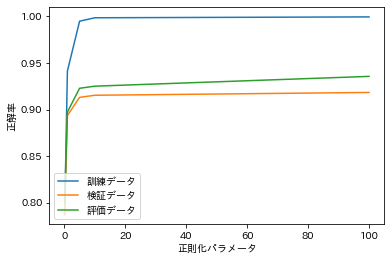

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib

train_acc = []
valid_acc = []
test_acc = []

C = [0.1, 1, 5, 10, 100]

for c in C:
    # 学習
    model = LogisticRegression(C=c) 
    model.fit(x_train, y_train)

    # 推論
    y_pred_train = model.predict(x_train)
    y_pred_valid = model.predict(x_valid)
    y_pred_test = model.predict(x_test)

    # 正解率
    train_acc.append(accuracy_score(y_true=y_train, y_pred=y_pred_train))
    valid_acc.append(accuracy_score(y_true=y_valid, y_pred=y_pred_valid))
    test_acc.append(accuracy_score(y_true=y_test, y_pred=y_pred_test))
    print("正則化パラメータ : ", c)
    print('train に対する正解率：', accuracy_score(y_true=y_train, y_pred=y_pred_train))
    print('valid に対する正解率：', accuracy_score(y_true=y_valid, y_pred=y_pred_valid))
    print('test  に対する正解率：', accuracy_score(y_true=y_test, y_pred=y_pred_test))
    print()


plt.plot(C, train_acc, label="訓練データ")
plt.plot(C, valid_acc, label="検証データ")
plt.plot(C, test_acc, label="評価データ") 

plt.legend(loc="lower left") 
plt.xlabel("正則化パラメータ")
plt.ylabel("正解率")
plt.show()


#59. ハイパーパラメータの探索
学習アルゴリズムや学習パラメータを変えながら，カテゴリ分類モデルを学習せよ．検証データ上の正解率が最も高くなる学習アルゴリズム・パラメータを求めよ．また，その学習アルゴリズム・パラメータを用いたときの評価データ上の正解率を求めよ．

https://qiita.com/monda00/items/9dd3158e07305eefa121


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

best_acc = 0
best_c = 0
best_i = 0

C = [0.1, 1, 5, 10, 100]
max_iter = [50, 100, 200]

for c in C:
    for i in max_iter:
        # 学習
        model = LogisticRegression(C=c, max_iter=i) 
        model.fit(x_train, y_train)

        # 推論
        y_pred_valid = model.predict(x_valid)
        
        # 正解率
        acc = accuracy_score(y_true=y_valid, y_pred=y_pred_valid)
        print("正則化パラメータ : ", c, '\t', "最大イテレータ : ", i)
        print('valid に対する正解率：', acc)
        print()

        if best_acc < acc:
            best_acc = acc
            best_c = c
            best_i = i
    
print("valid に対して最適なパラメータ : ", best_c, '\t', best_i)
print("その時の正解率 : ", best_acc, "\n")
    


# K-近傍法
model = KNeighborsClassifier(n_neighbors=4)
model.fit(x_train, y_train)
k_acc = model.score(x_valid, y_valid)
print('valid に対する正解率 : ', k_acc, '\n')


if k_acc > best_acc: # 検証データに対する正解率の比較
    print('検証データ上の正解率が最も高くなる学習アルゴリズム・パラメータ : K-近傍法')
    print('test  に対する正解率 : ', model.score(x_test, y_test), "\n")

else :
    # 推論
    print('検証データ上の正解率が最も高くなる学習アルゴリズム・パラメータ : ロジスティック回帰, C=',best_c, "max_iter=", best_i)
    model = LogisticRegression(C=best_c, max_iter=best_i) 
    model.fit(x_train, y_train)
    y_pred_test = model.predict(x_test)
    print('test に対する正解率(ロジスティック回帰) : ', model.score(x_test, y_test), "\n")

正則化パラメータ :  0.1 	 最大イテレータ :  50
valid に対する正解率： 0.7901049475262368

正則化パラメータ :  0.1 	 最大イテレータ :  100
valid に対する正解率： 0.787856071964018

正則化パラメータ :  0.1 	 最大イテレータ :  200
valid に対する正解率： 0.787856071964018

正則化パラメータ :  1 	 最大イテレータ :  50
valid に対する正解率： 0.8943028485757122

正則化パラメータ :  1 	 最大イテレータ :  100
valid に対する正解率： 0.8935532233883059

正則化パラメータ :  1 	 最大イテレータ :  200
valid に対する正解率： 0.8935532233883059

正則化パラメータ :  5 	 最大イテレータ :  50
valid に対する正解率： 0.9085457271364318

正則化パラメータ :  5 	 最大イテレータ :  100
valid に対する正解率： 0.9130434782608695

正則化パラメータ :  5 	 最大イテレータ :  200
valid に対する正解率： 0.9107946026986506

正則化パラメータ :  10 	 最大イテレータ :  50
valid に対する正解率： 0.9130434782608695

正則化パラメータ :  10 	 最大イテレータ :  100
valid に対する正解率： 0.9152923538230885

正則化パラメータ :  10 	 最大イテレータ :  200
valid に対する正解率： 0.9145427286356822

正則化パラメータ :  100 	 最大イテレータ :  50
valid に対する正解率： 0.9100449775112444

正則化パラメータ :  100 	 最大イテレータ :  100
valid に対する正解率： 0.9182908545727136

正則化パラメータ :  100 	 最大イテレータ :  200
valid に対する正解率： 0.9212893553223388

va